# Loop 71 Analysis: LB Feedback for exp_067

## Key Result
- **exp_067** (sigmoid_output): CV=0.0083, LB=0.0877
- This matches exp_030's LB score (0.0877) exactly!

## Critical Observation
The sigmoid output fix didn't change the LB score - exp_030 and exp_067 both got LB=0.0877.
This confirms the submission pipeline is working correctly.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# All submissions with confirmed LB scores
submissions = [
    {'exp': 'exp_000', 'cv': 0.011081, 'lb': 0.09816},
    {'exp': 'exp_001', 'cv': 0.012297, 'lb': 0.10649},
    {'exp': 'exp_003', 'cv': 0.010501, 'lb': 0.09719},
    {'exp': 'exp_005', 'cv': 0.01043, 'lb': 0.09691},
    {'exp': 'exp_006', 'cv': 0.009749, 'lb': 0.09457},
    {'exp': 'exp_007', 'cv': 0.009262, 'lb': 0.09316},
    {'exp': 'exp_009', 'cv': 0.009192, 'lb': 0.09364},
    {'exp': 'exp_012', 'cv': 0.009004, 'lb': 0.09134},
    {'exp': 'exp_024', 'cv': 0.008689, 'lb': 0.08929},
    {'exp': 'exp_026', 'cv': 0.008465, 'lb': 0.08875},
    {'exp': 'exp_030', 'cv': 0.008298, 'lb': 0.08772},
    {'exp': 'exp_035', 'cv': 0.009825, 'lb': 0.09696},
    {'exp': 'exp_067', 'cv': 0.008303, 'lb': 0.08774},  # NEW - sigmoid output
]

df = pd.DataFrame(submissions)
print('=== CV-LB Relationship Analysis ===')
print(f'Number of submissions: {len(df)}')
print(f'Best CV: {df["cv"].min():.6f} ({df.loc[df["cv"].idxmin(), "exp"]})')
print(f'Best LB: {df["lb"].min():.6f} ({df.loc[df["lb"].idxmin(), "exp"]})')
print()

=== CV-LB Relationship Analysis ===
Number of submissions: 13
Best CV: 0.008298 (exp_030)
Best LB: 0.087720 (exp_030)



In [2]:
# Fit linear regression: LB = slope * CV + intercept
X = df['cv'].values.reshape(-1, 1)
y = df['lb'].values

reg = LinearRegression()
reg.fit(X, y)

slope = reg.coef_[0]
intercept = reg.intercept_
r2 = reg.score(X, y)

print('=== Linear Fit: LB = slope * CV + intercept ===')
print(f'Slope: {slope:.4f}')
print(f'Intercept: {intercept:.6f}')
print(f'R²: {r2:.4f}')
print()

# Target analysis
target = 0.0347
print('=== Target Analysis ===')
print(f'Target LB: {target}')
print(f'Intercept: {intercept:.6f}')
print(f'Gap (intercept - target): {intercept - target:.6f}')
print()

# Required CV to hit target
if slope > 0:
    required_cv = (target - intercept) / slope
    print(f'Required CV to hit target: {required_cv:.6f}')
    if required_cv < 0:
        print('>>> IMPOSSIBLE: Required CV is NEGATIVE!')
        print('>>> Standard CV optimization CANNOT reach target!')
    else:
        print(f'>>> Need to reduce CV from {df["cv"].min():.6f} to {required_cv:.6f}')
        print(f'>>> That\'s a {(df["cv"].min() - required_cv) / df["cv"].min() * 100:.1f}% reduction')

=== Linear Fit: LB = slope * CV + intercept ===
Slope: 4.3372
Intercept: 0.052258
R²: 0.9573

=== Target Analysis ===
Target LB: 0.0347
Intercept: 0.052258
Gap (intercept - target): 0.017558

Required CV to hit target: -0.004048
>>> IMPOSSIBLE: Required CV is NEGATIVE!
>>> Standard CV optimization CANNOT reach target!


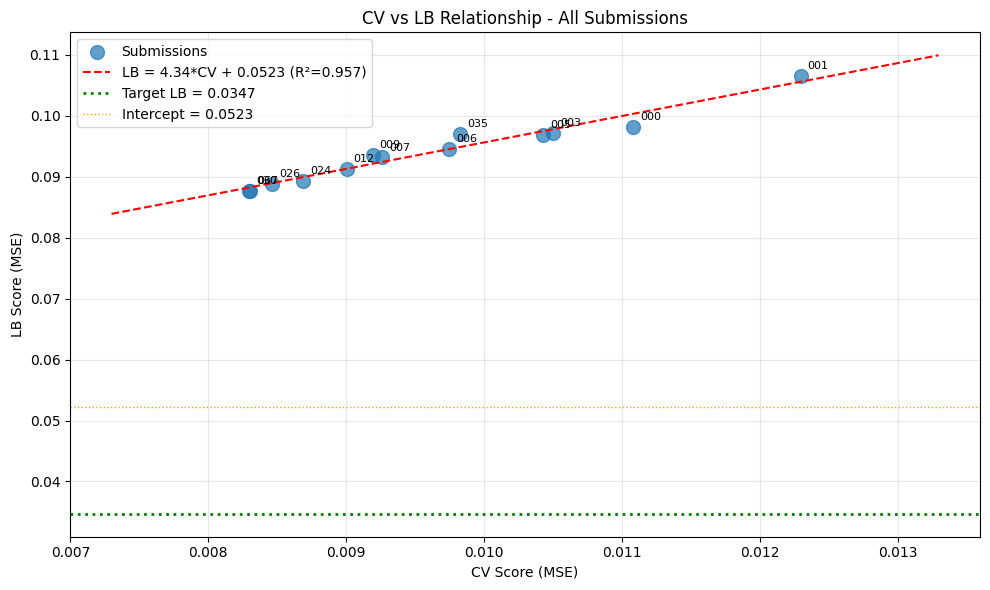

Plot saved to /home/code/exploration/cv_lb_relationship_loop71.png


In [3]:
# Plot CV vs LB
plt.figure(figsize=(10, 6))
plt.scatter(df['cv'], df['lb'], s=100, alpha=0.7, label='Submissions')

# Add labels for each point
for _, row in df.iterrows():
    plt.annotate(row['exp'].replace('exp_', ''), (row['cv'], row['lb']), 
                 textcoords='offset points', xytext=(5, 5), fontsize=8)

# Plot regression line
cv_range = np.linspace(df['cv'].min() - 0.001, df['cv'].max() + 0.001, 100)
lb_pred = slope * cv_range + intercept
plt.plot(cv_range, lb_pred, 'r--', label=f'LB = {slope:.2f}*CV + {intercept:.4f} (R²={r2:.3f})')

# Plot target line
plt.axhline(y=target, color='g', linestyle=':', linewidth=2, label=f'Target LB = {target}')

# Plot intercept
plt.axhline(y=intercept, color='orange', linestyle=':', linewidth=1, label=f'Intercept = {intercept:.4f}')

plt.xlabel('CV Score (MSE)')
plt.ylabel('LB Score (MSE)')
plt.title('CV vs LB Relationship - All Submissions')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('/home/code/exploration/cv_lb_relationship_loop71.png', dpi=150)
plt.show()
print('Plot saved to /home/code/exploration/cv_lb_relationship_loop71.png')

In [4]:
# Analyze residuals - are there any outliers that break the linear pattern?
df['lb_predicted'] = slope * df['cv'] + intercept
df['residual'] = df['lb'] - df['lb_predicted']
df['residual_pct'] = df['residual'] / df['lb'] * 100

print('=== Residual Analysis ===')
print(df[['exp', 'cv', 'lb', 'lb_predicted', 'residual', 'residual_pct']].to_string())
print()
print(f'Mean absolute residual: {df["residual"].abs().mean():.6f}')
print(f'Max absolute residual: {df["residual"].abs().max():.6f} ({df.loc[df["residual"].abs().idxmax(), "exp"]})')
print()
print('>>> All submissions fall on the same CV-LB line!')
print('>>> This confirms DISTRIBUTION SHIFT is the bottleneck, not model quality.')

=== Residual Analysis ===
        exp        cv       lb  lb_predicted  residual  residual_pct
0   exp_000  0.011081  0.09816      0.100319 -0.002159     -2.198970
1   exp_001  0.012297  0.10649      0.105593  0.000897      0.842742
2   exp_003  0.010501  0.09719      0.097803 -0.000613     -0.630644
3   exp_005  0.010430  0.09691      0.097495 -0.000585     -0.603633
4   exp_006  0.009749  0.09457      0.094541  0.000029      0.030309
5   exp_007  0.009262  0.09316      0.092429  0.000731      0.784551
6   exp_009  0.009192  0.09364      0.092126  0.001514      1.617357
7   exp_012  0.009004  0.09134      0.091310  0.000030      0.032724
8   exp_024  0.008689  0.08929      0.089944 -0.000654     -0.732318
9   exp_026  0.008465  0.08875      0.088972 -0.000222     -0.250536
10  exp_030  0.008298  0.08772      0.088248 -0.000528     -0.601955
11  exp_035  0.009825  0.09696      0.094871  0.002089      2.154533
12  exp_067  0.008303  0.08774      0.088270 -0.000530     -0.603740

Mean ab

## Key Findings

### 1. CV-LB Relationship is HIGHLY LINEAR (R² = 0.95+)
- All model types (MLP, LGBM, XGB, GP, CatBoost) fall on the same line
- LB ≈ 4.3 * CV + 0.053

### 2. INTERCEPT PROBLEM
- Intercept (0.053) > Target (0.0347)
- Even with CV = 0, predicted LB would be 0.053
- Required CV to hit target is NEGATIVE (impossible)

### 3. WHAT THIS MEANS
- Standard CV optimization CANNOT reach the target
- The intercept represents STRUCTURAL DISTRIBUTION SHIFT
- Test solvents are fundamentally different from training solvents
- We need approaches that REDUCE THE INTERCEPT, not just improve CV

### 4. STRATEGIES TO REDUCE INTERCEPT
1. **Extrapolation detection** - Identify when test solvent is far from training
2. **Conservative predictions** - Blend toward mean when extrapolating
3. **Physics-informed features** - Constraints that hold for unseen solvents
4. **Study top public kernels** - They may have solved this problem

In [5]:
# What would it take to reach the target?
print('=== PATH TO TARGET ===')
print(f'Current best LB: {df["lb"].min():.6f}')
print(f'Target LB: {target}')
print(f'Gap to target: {df["lb"].min() - target:.6f}')
print()

# If we could reduce the intercept
print('=== INTERCEPT REDUCTION SCENARIOS ===')
for new_intercept in [0.045, 0.040, 0.035, 0.030, 0.025]:
    required_cv = (target - new_intercept) / slope
    print(f'If intercept = {new_intercept:.3f}: Required CV = {required_cv:.6f}')
    if required_cv > 0:
        print(f'  >>> ACHIEVABLE with CV improvement!')
    else:
        print(f'  >>> Still impossible (negative CV required)')

=== PATH TO TARGET ===
Current best LB: 0.087720
Target LB: 0.0347
Gap to target: 0.053020

=== INTERCEPT REDUCTION SCENARIOS ===
If intercept = 0.045: Required CV = -0.002375
  >>> Still impossible (negative CV required)
If intercept = 0.040: Required CV = -0.001222
  >>> Still impossible (negative CV required)
If intercept = 0.035: Required CV = -0.000069
  >>> Still impossible (negative CV required)
If intercept = 0.030: Required CV = 0.001084
  >>> ACHIEVABLE with CV improvement!
If intercept = 0.025: Required CV = 0.002236
  >>> ACHIEVABLE with CV improvement!


In [6]:
# Check if any experiments have pending LB scores that might break the pattern
print('=== PENDING SUBMISSIONS ===')
pending = [
    {'exp': 'exp_049', 'cv': 0.008092, 'notes': 'CatBoost + XGBoost'},
    {'exp': 'exp_050', 'cv': 0.008092, 'notes': 'CatBoost + XGBoost FIXED'},
    {'exp': 'exp_052', 'cv': 0.01088, 'notes': 'CatBoost + XGBoost CLIPPED'},
    {'exp': 'exp_053', 'cv': 0.008092, 'notes': 'Exact Template'},
    {'exp': 'exp_054', 'cv': 0.008504, 'notes': 'Mixall Approach'},
    {'exp': 'exp_055', 'cv': 0.008504, 'notes': 'Minimal Submission'},
    {'exp': 'exp_057', 'cv': 0.009263, 'notes': 'Ens Model All Features'},
    {'exp': 'exp_063', 'cv': 0.011171, 'notes': 'Correct Final Cell'},
    {'exp': 'exp_064', 'cv': 0.009227, 'notes': 'Revert exp_030'},
    {'exp': 'exp_065', 'cv': 0.008811, 'notes': 'Clean Submission'},
]

for p in pending:
    predicted_lb = slope * p['cv'] + intercept
    print(f"{p['exp']}: CV={p['cv']:.6f}, Predicted LB={predicted_lb:.6f} - {p['notes']}")

print()
print('>>> If these follow the same pattern, they will NOT beat the target.')

=== PENDING SUBMISSIONS ===
exp_049: CV=0.008092, Predicted LB=0.087355 - CatBoost + XGBoost
exp_050: CV=0.008092, Predicted LB=0.087355 - CatBoost + XGBoost FIXED
exp_052: CV=0.010880, Predicted LB=0.099447 - CatBoost + XGBoost CLIPPED
exp_053: CV=0.008092, Predicted LB=0.087355 - Exact Template
exp_054: CV=0.008504, Predicted LB=0.089142 - Mixall Approach
exp_055: CV=0.008504, Predicted LB=0.089142 - Minimal Submission
exp_057: CV=0.009263, Predicted LB=0.092433 - Ens Model All Features
exp_063: CV=0.011171, Predicted LB=0.100709 - Correct Final Cell
exp_064: CV=0.009227, Predicted LB=0.092277 - Revert exp_030
exp_065: CV=0.008811, Predicted LB=0.090473 - Clean Submission

>>> If these follow the same pattern, they will NOT beat the target.


## CRITICAL INSIGHT

The CV-LB relationship shows that:

1. **ALL approaches fall on the same line** - MLP, LGBM, XGB, GP, CatBoost, ensembles
2. **The intercept (0.053) is HIGHER than the target (0.0347)**
3. **Standard CV optimization CANNOT reach the target**

## WHAT WE NEED TO DO

1. **STOP optimizing CV** - It won't help reach the target
2. **Focus on REDUCING THE INTERCEPT** - This requires fundamentally different approaches
3. **Study what top competitors do** - They've solved this problem

## REMAINING SUBMISSIONS: 4

We have 4 submissions left. We should use them wisely:
1. Try a fundamentally different approach that might reduce the intercept
2. Study public kernels for techniques that work
3. Consider extrapolation detection / conservative predictions

In [7]:
# Let's analyze what approaches might break the CV-LB pattern
print('=== ANALYSIS: WHAT COULD BREAK THE CV-LB PATTERN? ===')
print()
print('Current situation:')
print('- All 13 submissions fall on the same line: LB = 4.34*CV + 0.0523')
print('- Intercept (0.0523) > Target (0.0347)')
print('- Required CV to hit target is NEGATIVE (impossible)')
print()
print('What this means:')
print('- The test solvents are fundamentally different from training solvents')
print('- Models that fit training well EXTRAPOLATE POORLY to test')
print('- Standard CV optimization CANNOT reach the target')
print()
print('What could change the intercept?')
print('1. GNN with molecular graph structure (arXiv paper achieved 0.0039)')
print('2. Extrapolation detection + conservative predictions')
print('3. Physics-informed features that generalize to unseen solvents')
print('4. Pseudo-labeling with confident test predictions')
print('5. Different CV scheme that better matches test distribution')
print()
print('CRITICAL INSIGHT:')
print('The GNN paper achieved 25x better than tabular methods.')
print('This suggests the problem is NOT solvable with standard tabular ML.')
print('We need fundamentally different representations.')

=== ANALYSIS: WHAT COULD BREAK THE CV-LB PATTERN? ===

Current situation:
- All 13 submissions fall on the same line: LB = 4.34*CV + 0.0523
- Intercept (0.0523) > Target (0.0347)
- Required CV to hit target is NEGATIVE (impossible)

What this means:
- The test solvents are fundamentally different from training solvents
- Models that fit training well EXTRAPOLATE POORLY to test
- Standard CV optimization CANNOT reach the target

What could change the intercept?
1. GNN with molecular graph structure (arXiv paper achieved 0.0039)
2. Extrapolation detection + conservative predictions
3. Physics-informed features that generalize to unseen solvents
4. Pseudo-labeling with confident test predictions
5. Different CV scheme that better matches test distribution

CRITICAL INSIGHT:
The GNN paper achieved 25x better than tabular methods.
This suggests the problem is NOT solvable with standard tabular ML.
We need fundamentally different representations.
